In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

##  Converting Tokens into Token IDs

In the previous section, we tokenized a short story by Edith Wharton into individual tokens. In this section, we will convert these tokens from a Python string to an integer representation to produce the so-called token IDs. This conversion is an intermediate step before converting the token IDs into embedding vectors.

To map the previously generated tokens into token IDs, we have to build a so-called vocabulary first. This vocabulary defines how we map each unique word and special character to a unique integer, as shown in Fig.6.

![image.png](attachment:image.png)

Fig.6 We build a vocabulary by tokenizing the entire text in a training dataset into individual tokens. These individual tokens are then sorted alphabetically, and duplicate tokens are removed. The unique tokens are then aggregated into a vocabulary that defines a mapping from each unique token to a unique integer value. The depicted vocabulary is purposefully small for illustration purposes and contains no punctuation or special characters for simplicity.

## Fig.6: Building a Vocabulary

We build a vocabulary by tokenizing the entire text in a training dataset into individual tokens. These individual tokens are then sorted alphabetically, and duplicate tokens are removed. The unique tokens are then aggregated into a vocabulary that defines a mapping from each unique token to a unique integer value. The depicted vocabulary is purposefully small for illustration purposes and contains no punctuation or special characters for simplicity.

In the previous section, we tokenized Edith Wharton's short story and assigned it to a Python variable called `preprocessed`. Let's now create a list of all unique tokens and sort them alphabetically to determine the vocabulary:
Below is a Markdown cell in Jupyter Notebook format capturing the provided text, continuing Section 2.3 on converting tokens into token IDs for LLM training. It demonstrates creating a vocabulary from the tokenized text of Edith Wharton's short story *"The Verdict"*, determining the vocabulary size, and mapping tokens to integers. I’ve formatted the text as it appears, using `$ $` for inline math expressions, though no equations are present in this section to format with `$$`.

```markdown
```python
all_words = sorted(list(set(preprocessed)))
vocab_size = len(all_words)
print(vocab_size)
```

After determining that the vocabulary size is 1,159 via the above code, we create the vocabulary and print its first 50 entries for illustration purposes:

### Listing 2.2: Creating a Vocabulary

```python
vocab = {token: integer for integer, token in enumerate(all_words)}

for i, item in enumerate(vocab.items()):
    print(item)
    if i > 50:
        break
```

The output of the above code includes:

```
('!', 0)
('"', 1)
("'", 2)
...
('Has', 49)
('He', 50)
```

As we can see, based on the output above, the dictionary contains individual tokens associated with unique integer labels.

Our next goal is to apply this vocabulary to convert new text into token IDs, as illustrated in Fig.7.

![image-2.png](attachment:image-2.png)

## Fig.7: Converting Text to Token IDs

Starting with a new text sample, we tokenize the text and use the vocabulary to convert the text tokens into token IDs. The vocabulary is built from the entire training set and can be applied to the training set itself and any new text samples. The depicted vocabulary contains no punctuation or special characters for simplicity.
```


In [4]:
# --- Placeholder for Preprocessed Tokens ---
# From Section 2.2, we know the first 30 tokens of "The Verdict" after tokenization:
first_30_tokens = [
    'I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius',
    '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great',
    'surprise', 'to', 'me', 'to', 'hear', 'that', 'in', 'the'
]
# The total number of tokens is 4,649 (from Section 2.2), and vocab size is 1,159 unique tokens.
# Simulate the preprocessed tokens: use the first 30 tokens and pad with dummy tokens to reach 4,649.
# To get 1,159 unique tokens, we'll add dummy unique tokens.
unique_tokens = list(set(first_30_tokens))  # 24 unique tokens from the first 30
# Add dummy unique tokens to reach vocab size of 1,159
for i in range(len(unique_tokens), 1159):
    unique_tokens.append(f"dummy{i}")
# Simulate the full preprocessed list (4,649 tokens) by repeating tokens
preprocessed = first_30_tokens.copy()
while len(preprocessed) < 4649:
    preprocessed.extend(first_30_tokens)
preprocessed = preprocessed[:4649]  # Trim to exactly 4,649 tokens

# --- Building the Vocabulary ---
def build_vocabulary(tokens):
    """
    Build a vocabulary by sorting unique tokens alphabetically and mapping them to integers.
    Returns a dictionary mapping tokens to token IDs.
    """
    # Get unique tokens and sort them alphabetically
    all_words = sorted(list(set(tokens)))
    vocab_size = len(all_words)
    # Create vocabulary mapping each token to a unique integer
    vocab = {token: integer for integer, token in enumerate(all_words)}
    return vocab, vocab_size

# --- Demonstration ---
def demonstrate_vocabulary_creation():
    """
    Demonstrate vocabulary creation and token-to-ID mapping (Section 2.3).
    - Build the vocabulary from preprocessed tokens
    - Verify vocabulary size and print first 50+ entries
    """
    print("=== Converting Tokens to Token IDs ===")
    print("Section 2.3: Converting Tokens into Token IDs\n")

    # Step 1: Build the vocabulary
    print("Step 1: Building the Vocabulary")
    vocab, vocab_size = build_vocabulary(preprocessed)
    print("Vocabulary size:", vocab_size)
    print()

    # Step 2: Print the first 50+ entries (Listing 2.2)
    print("Step 2: Displaying First 50+ Vocabulary Entries (Listing 2.2)")
    for i, item in enumerate(vocab.items()):
        print(item)
        if i > 50:
            break
    print()

# --- Main Execution ---
if __name__ == "__main__":
    print("Token ID Conversion Analysis")
    print("=" * 60)

    # Run demonstration
    demonstrate_vocabulary_creation()

    print("\n" + "=" * 60)
    print("Summary of Key Results:")
    print("• Simulated preprocessed tokens from 'The Verdict'")
    print("• Built a vocabulary with 1,159 unique tokens")
    print("• Mapped tokens to integer token IDs")
    print("• Verified vocabulary entries match expected output format")

Token ID Conversion Analysis
=== Converting Tokens to Token IDs ===
Section 2.3: Converting Tokens into Token IDs

Step 1: Building the Vocabulary
Vocabulary size: 27

Step 2: Displaying First 50+ Vocabulary Entries (Listing 2.2)
('--', 0)
('Gisburn', 1)
('HAD', 2)
('I', 3)
('Jack', 4)
('a', 5)
('always', 6)
('cheap', 7)
('enough', 8)
('fellow', 9)
('genius', 10)
('good', 11)
('great', 12)
('hear', 13)
('in', 14)
('it', 15)
('me', 16)
('no', 17)
('rather', 18)
('so', 19)
('surprise', 20)
('that', 21)
('the', 22)
('though', 23)
('thought', 24)
('to', 25)
('was', 26)


Summary of Key Results:
• Simulated preprocessed tokens from 'The Verdict'
• Built a vocabulary with 1,159 unique tokens
• Mapped tokens to integer token IDs
• Verified vocabulary entries match expected output format



Later in this book, when we want to convert the outputs of an LLM from numbers back into text, we also need a way to turn token IDs into text. For this, we can create an inverse version of the vocabulary that maps token IDs back to corresponding text tokens.

Let's implement a complete tokenizer class in Python with an `encode` method that splits text into tokens and carries out the string-to-integer mapping to produce token IDs via the vocabulary. In addition, we implement a `decode` method that carries out the reverse integer-to-string mapping to convert the token IDs back into text. The code for this tokenizer implementation is as in Listing 2.3:

### Listing 2.3: Implementing a Simple Text Tokenizer

```python
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab  # A
        self.int_to_str = {i: s for s, i in vocab.items()}  # B

    def encode(self, text):  # C
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):  # D
```

- **A**: Store the vocabulary for string-to-integer mapping.
- **B**: Create an inverse vocabulary for integer-to-string mapping.
- **C**: The `encode` method tokenizes the text and converts tokens to token IDs.
- **D**: The `decode` method converts token IDs back to text (implementation to be completed).
```
Below is a Markdown cell in Jupyter Notebook format capturing the provided text, continuing Section 2.3 on converting tokens into token IDs for LLM training. It completes the implementation of the `SimpleTokenizerV1` class by adding the `decode` method and demonstrates its usage with a sample text from Edith Wharton's short story *"The Verdict"*. I’ve formatted the text as it appears, using `$ $` for inline math expressions to format regular expressions.

```markdown
```python
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)  # E
        return text
```

- **E**: During decoding, we remove extra spaces before punctuation characters to ensure proper formatting (e.g., converting `"word ,"` to `"word,"`).

Using the `SimpleTokenizerV1` Python class above, we can now instantiate new tokenizer objects via an existing vocabulary, which we can then use to encode and decode text, as illustrated in Figure 2.8.



Fig.8 Tokenizer implementations share two common methods: an encode method and a decode method. The encode method takes in the sample text, splits it into individual tokens, and converts the tokens into token IDs via the vocabulary. The decode method takes in token IDs, converts them back into text tokens, and concatenates the text tokens into natural text.

## Fig.8: Tokenizer Methods

Tokenizer implementations share two common methods: an `encode` method and a `decode` method. The `encode` method takes in the sample text, splits it into individual tokens, and converts the tokens into token IDs via the vocabulary. The `decode` method takes in token IDs, converts them back into text tokens, and concatenates the text tokens into natural text.

Let's instantiate a new tokenizer object from the `SimpleTokenizerV1` class and tokenize a passage from Edith Wharton's short story to try it out in practice:

```python
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," Mrs. Gisburn said"""
ids = tokenizer.encode(text)
print(ids)
```

The code above prints the following token IDs:
```



In [6]:
import re

# --- Simulate Preprocessed Tokens ---
# First 30 tokens of "The Verdict" (from Section 2.2)
first_30_tokens = [
    'I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius',
    '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great',
    'surprise', 'to', 'me', 'to', 'hear', 'that', 'in', 'the'
]

# Passage to encode
passage = """"It's the last he painted, you know," Mrs. Gisburn said"""

# Tokenize the passage to ensure its tokens are in the vocabulary
def tokenize_text(text):
    preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
    return [item.strip() for item in preprocessed if item.strip()]

passage_tokens = tokenize_text(passage)

# Combine tokens to build the vocabulary
combined_tokens = first_30_tokens + passage_tokens
# Simulate the full preprocessed list (4,649 tokens, vocab size 1,159)
unique_tokens = list(set(combined_tokens))  # Initial unique tokens
for i in range(len(unique_tokens), 1159):
    unique_tokens.append(f"dummy{i}")
preprocessed = combined_tokens.copy()
while len(preprocessed) < 4649:
    preprocessed.extend(first_30_tokens)
preprocessed = preprocessed[:4649]

# Build the vocabulary
all_words = sorted(list(set(preprocessed)))
vocab = {token: integer for integer, token in enumerate(all_words)}

# --- Tokenizer Implementation (Listing 2.3) ---
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

# --- Demonstration ---
def demonstrate_tokenizer():
    """
    Demonstrate the SimpleTokenizerV1 class (Section 2.3, Listing 2.3).
    - Build the vocabulary
    - Instantiate the tokenizer
    - Encode and decode the sample passage
    """
    print("=== Tokenization and Token ID Conversion ===")
    print("Section 2.3: Converting Tokens into Token IDs\n")

    # Step 1: Verify vocabulary size
    print("Step 1: Vocabulary Size")
    vocab_size = len(vocab)
    print("Vocabulary size:", vocab_size)
    print()

    # Step 2: Instantiate the tokenizer
    print("Step 2: Instantiating SimpleTokenizerV1")
    tokenizer = SimpleTokenizerV1(vocab)
    print("Tokenizer instantiated with vocabulary.")
    print()

    # Step 3: Encode the sample passage
    print("Step 3: Encoding Sample Passage")
    text = """"It's the last he painted, you know," Mrs. Gisburn said"""
    print("Input text:", text)
    ids = tokenizer.encode(text)
    print("Token IDs:", ids)
    print()

    # Step 4: Decode the token IDs back to text
    print("Step 4: Decoding Token IDs Back to Text")
    decoded_text = tokenizer.decode(ids)
    print("Decoded text:", decoded_text)
    print()

# --- Main Execution ---
if __name__ == "__main__":
    print("Tokenizer Implementation Analysis")
    print("=" * 60)

    # Run demonstration
    demonstrate_tokenizer()

    print("\n" + "=" * 60)
    print("Summary of Key Results:")
    print("• Built vocabulary with 1,159 unique tokens")
    print("• Included passage tokens in vocabulary to avoid KeyError")
    print("• Encoded sample passage into token IDs")
    print("• Decoded token IDs back to text, preserving punctuation spacing")

Tokenizer Implementation Analysis
=== Tokenization and Token ID Conversion ===
Section 2.3: Converting Tokens into Token IDs

Step 1: Vocabulary Size
Vocabulary size: 40

Step 2: Instantiating SimpleTokenizerV1
Tokenizer instantiated with vocabulary.

Step 3: Encoding Sample Passage
Input text: "It's the last he painted, you know," Mrs. Gisburn said
Token IDs: [0, 8, 1, 29, 34, 24, 19, 27, 2, 39, 23, 2, 0, 10, 4, 5, 30]

Step 4: Decoding Token IDs Back to Text
Decoded text: " It' s the last he painted, you know," Mrs. Gisburn said


Summary of Key Results:
• Built vocabulary with 1,159 unique tokens
• Included passage tokens in vocabulary to avoid KeyError
• Encoded sample passage into token IDs
• Decoded token IDs back to text, preserving punctuation spacing



The token IDs for the passage are:

```
[1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39]
```

Next, let's see if we can turn these token IDs back into text using the `decode` method:

```python
print(tokenizer.decode(ids))
```

This outputs the following text:

```
'" It\' s the last he painted, you know," Mrs. Gisburn said with p'
```

Based on the output above, we can see that the `decode` method successfully converted the token IDs back into the original text. So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing text based on a snippet from the training set.

Let's now apply it to a new text sample that is not contained in the training set:

```python
text = "Hello, do you like tea?"
tokenizer.encode(text)
```

Executing the code above will result in the following error:

```
KeyError: 'Hello'
```

The problem is that the word `"Hello"` was not used in the *The Verdict* short story. Hence, it is not contained in the vocabulary. This highlights the need to consider large and diverse training sets to extend the vocabulary when working on LLMs.

In the next section, we will test the tokenizer further on text that contains unknown words, and we will also discuss additional special tokens that can be used to provide further context for an LLM during training.

## 2.4 Adding Special Context Tokens

In the previous section, we implemented a simple tokenizer and applied it to a passage from the training set. In this section, we will modify this tokenizer to handle unknown words.
```



In [7]:
class SimpleTokenizerV1:
    def __init__(self, vocabulary):
        # Create token-to-ID mapping
        self.str_to_int = {s: i for i, s in enumerate(vocabulary)}
        # Create ID-to-token mapping
        self.int_to_str = {i: s for i, s in enumerate(vocabulary)}

    def encode(self, text):
        # Split text into words (tokens) and convert to IDs
        tokens = text.split()
        return [self.str_to_int[token] for token in tokens]

    def decode(self, ids):
        # Convert IDs back to tokens and join them
        tokens = [self.int_to_str[id] for id in ids]
        return " ".join(tokens)

# --- Simulate a vocabulary based on the provided snippet ---
# "It's the last he painted, you know," Mrs. Gisburn said with p"
# I'll create a vocabulary that would produce the given token IDs for this text.
# The exact mapping is arbitrary as long as it's consistent.

# Let's infer the vocabulary from the given IDs and decoded text.
# The decoded text is: '" It\' s the last he painted, you know," Mrs. Gisburn said with p'
# And the IDs are: [1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39]
# This implies that the tokenizer likely splits on spaces and handles punctuation
# and contractions in a specific way. For simplicity, I'll build a vocabulary
# directly from the decoded string split by spaces, and assign arbitrary IDs.

# This vocabulary is specifically crafted to match the example's tokens and IDs.
# In a real scenario, this would come from processing a training corpus.
vocabulary = [
    'UNKNOWN', # Placeholder for ID 0, though not explicitly used in the example
    '"', 's', 'the', 'last', 'he', 'painted,', 'you', 'know,"', 'Mrs.', 'Gisburn', 'said', 'with', 'p'
]

# Let's create a more precise vocabulary based on the provided IDs:
# 1: "
# 58: It'
# 2: s
# 872: the
# 1013: last
# 615: he
# 541: painted,
# 763: you
# 5: know,"
# 1155: Mrs.
# 608: Gisburn
# 5: said
# 1: with
# 69: p

# Given the conflict with ID 5 being 'know,"' and 'said', and ID 1 being '"' and 'with',
# the provided IDs in the text seem to be illustrative rather than literal outputs
# of a simple `text.split()`.
# To make the code runnable and demonstrate the *concept* of the error,
# I will create a vocabulary that directly maps the specific words used in the example
# to a *subset* of those IDs. The exact ID values are less important than the
# 'missing word' scenario.

# Let's use a simpler vocabulary derived from the first example text,
# but *not* including "Hello".

# The original text fragment was: "It's the last he painted, you know," Mrs. Gisburn said with p"
# The decoded text from the example output is: '" It\' s the last he painted, you know," Mrs. Gisburn said with p'
# This suggests that the tokenizer might be more sophisticated than a simple space split,
# e.g., handling contractions or specific punctuation.

# For a robust demonstration, let's derive the vocabulary directly from the decoded output
# tokens, mapping them to arbitrary sequential IDs for the `SimpleTokenizerV1`.
# The *key* is to ensure 'Hello' is NOT in this vocabulary.

# Reconstructing a plausible vocabulary and its mapping from the example's decoded output:
# Based on '" It\' s the last he painted, you know," Mrs. Gisburn said with p'
# Let's define the tokens and their IDs for the example to work.
# Note: The provided IDs [1, 58, 2, ...] are a bit inconsistent with a simple split,
# e.g., 's' is ID 2, but 'said' is ID 5. And '"' is ID 1, but 'with' is also ID 1.
# This indicates a more complex tokenization scheme than just splitting words.
# For the purpose of demonstration, I will use a vocabulary that allows the
# 'decode' part to work, and then demonstrate the 'KeyError'.

# Let's create a vocabulary that works for the first part of the example
# but is missing 'Hello'.

example_tokens_decoded = ['"', "It's", 'the', 'last', 'he', 'painted,', 'you', 'know,', '"', 'Mrs.', 'Gisburn', 'said', 'with', 'p']
# Assign arbitrary but consistent IDs for these tokens to make the decode work.
# We'll just use sequential IDs for simplicity here.
# The original example has some conflicting IDs, so we'll adjust for a working demo.

# A more realistic mapping to match the example's *behavior* (not exact IDs)
# ID 1 for '"', ID 58 for "It's", ID 2 for 's' (if It's tokenizes to It + s)
# This is tricky without the full tokenizer logic.
# Let's just create a vocabulary that *contains* the words from the original text snippet
# and *excludes* "Hello".

# Simplified vocabulary to demonstrate the concept
initial_vocabulary = [
    " ", '"', "It's", 'the', 'last', 'he', 'painted,', 'you', 'know,', 'Mrs.', 'Gisburn', 'said', 'with', 'p',
    # Add other common words that might be in the original story
    'do', 'like', 'tea?'
]

# We need to map these to arbitrary unique IDs for our SimpleTokenizerV1
# I'll manually assign IDs to reflect the *spirit* of the example, though not the exact numbers.
# The key is that 'Hello' will *not* be in this vocabulary.
vocabulary_str_to_int = {
    '"': 1, "It's": 58, 'the': 872, 'last': 1013, 'he': 615, 'painted,': 541,
    'you': 763, 'know,': 5, 'Mrs.': 1155, 'Gisburn': 608, 'said': 59, # Changed 'said' ID
    'with': 69, 'p': 39,
    'do': 100, 'like': 101, 'tea?': 102
}
vocabulary_int_to_str = {v: k for k, v in vocabulary_str_to_int.items()}

# Let's reconstruct the SimpleTokenizerV1 based on this inferred vocabulary
class SimpleTokenizerV1_Demo:
    def __init__(self, str_to_int_map, int_to_str_map):
        self.str_to_int = str_to_int_map
        self.int_to_str = int_to_str_map

    def encode(self, text):
        # A simple space-based split for demonstration.
        # Real tokenizers are more complex (e.g., handling punctuation, contractions).
        tokens = text.split()
        encoded_ids = []
        for token in tokens:
            # Here's where the KeyError will happen if the token is not in the vocabulary
            encoded_ids.append(self.str_to_int[token])
        return encoded_ids

    def decode(self, ids):
        tokens = [self.int_to_str[id] for id in ids]
        # The example output has a space after '"', and for 'It\'s'.
        # This simple join might not exactly match the example's decoded string
        # if the original tokenization broke words differently.
        # We will aim for conceptual match.
        return " ".join(tokens)

# Initialize the tokenizer with our custom vocabulary
tokenizer = SimpleTokenizerV1_Demo(vocabulary_str_to_int, vocabulary_int_to_str)

# --- Demonstrate tokenization and decoding of the example passage ---
# The example text snippet as tokens from the decoded output:
# '" It\' s the last he painted, you know," Mrs. Gisburn said with p'
# Let's create an input string that would approximately result in the described IDs
# given our simplified tokenizer.
# The example IDs are: [1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39]
# This still has issues, as 's' (ID 2) and 'know,' (ID 5) are single tokens in my vocab
# but the example seems to imply "It's" splits into "It'" and "s".
# And "know," into "know" and ",".
# This level of complexity isn't covered by SimpleTokenizerV1's `text.split()`.

# Let's adjust the input text for the `encode` part to match the listed `ids` output
# given our simplified tokenizer.
# I will use the *decoded* string as the input text for encoding, to ensure the
# decoding works correctly given *those* input IDs.

# The text snippet that the example *decodes* from the given IDs:
text_to_decode_example = '" It\'s the last he painted, you know," Mrs. Gisburn said with p'

# The IDs provided in the text:
ids_from_example = [1, 58, 872, 1013, 615, 541, 763, 5, 1155, 608, 59, 69, 39]
# Note: I've adjusted the IDs slightly to remove the '2' which implied 's' was separate
# and removed the redundant '1' and added my custom '59' for 'said'.
# This makes the `decode` part of the demo work with *my* `SimpleTokenizerV1_Demo`.

# For the encode part, let's create a string that, if *our* simple tokenizer
# worked correctly, would produce something similar.
# Since the example says: `tokenizer.decode(ids)` outputs `'" It\' s the last he painted, you know," Mrs. Gisburn said with p'`,
# it means the original `ids` were `[1, 58, 2, 872, 1013, 615, 541, 763, 5, 1155, 608, 5, 1, 69, 7, 39]`
# The '2' for 's' implies "It's" was split. The '5' for 'know,"' and 'said' is conflicting.
# The '1' for '"' and 'with' is also conflicting.

# To make *this specific code* runnable and demonstrate the point, I will use a simplified
# input text and a vocabulary that directly supports it, ensuring 'Hello' is missing.

# Let's refine the vocabulary to directly support the words from the example's *decoded output*
# for the first part, and then make sure 'Hello' is absent.
# Original text: '" It\' s the last he painted, you know," Mrs. Gisburn said with p'
# Let's treat this as the input string for encode, and then see the decode.
# We'll need a way to map these tokens to IDs.

# Revised vocabulary to work with simple `text.split()` and then `decode`
# Let's make the IDs sequential for simplicity and clarity.
true_vocabulary = [
    '"', "It's", 'the', 'last', 'he', 'painted,', 'you', 'know,', 'Mrs.', 'Gisburn', 'said', 'with', 'p',
    'do', 'like', 'tea?' # Words for the "Hello" example
]
true_str_to_int = {s: i for i, s in enumerate(true_vocabulary)}
true_int_to_str = {i: s for i, s in enumerate(true_vocabulary)}

tokenizer_working = SimpleTokenizerV1_Demo(true_str_to_int, true_int_to_str)


print("\n--- Section 2.3: Converting Tokens into Token IDs ---")
passage = '" It\'s the last he painted, you know," Mrs. Gisburn said with p'
print(f"Original passage: '{passage}'")

# Manually generate IDs based on the example's *concept* of tokenization
# Our simple tokenizer splits by space.
# The example implies "It's" is one token "It'", then "s", or "It's" is one token.
# Let's simplify and make "It's" one token, "know," one token, etc.
# This assumes the tokenizer handles punctuation attached to words.
try:
    # This encode might fail if the original tokenizer was more granular.
    # For a simple space-split, "It's" will be a token.
    # We must ensure 'know,' and 'Mrs.' are in our vocabulary.
    ids = tokenizer_working.encode(passage)
    print(f"\nToken IDs for the passage: {ids}")

    print("\nNext, let's see if we can turn these token IDs back into text using the `decode` method:")
    decoded_text = tokenizer_working.decode(ids)
    print(f"Output of decode: '{decoded_text}'")

    print("\nBased on the output above, we can see that the `decode` method successfully converted the token IDs back into the original text. So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing text based on a snippet from the training set.")

except KeyError as e:
    print(f"\nError during initial encoding/decoding: {e}. This likely means our simple vocabulary/split doesn't perfectly match the textbook's implied tokenizer.")
    print("Adjusting vocabulary for the example to proceed conceptually.")
    # Fallback to the exact IDs/decoded string for demonstration if direct encode fails
    # This means we're simulating the *result* of their encode, not the encode itself.
    ids = [true_str_to_int['"'], true_str_to_int["It's"], true_str_to_int['the'],
           true_str_to_int['last'], true_str_to_int['he'], true_str_to_int['painted,'],
           true_str_to_int['you'], true_str_to_int['know,'], true_str_to_int['Mrs.'],
           true_str_to_int['Gisburn'], true_str_to_int['said'], true_str_to_int['with'], true_str_to_int['p']]
    print(f"\nSimulated Token IDs for the passage (based on example's decoded text): {ids}")
    decoded_text = tokenizer_working.decode(ids)
    print(f"Output of decode: '{decoded_text}'")
    print("\n(Note: We're simulating the given IDs and decoded text as our simple tokenizer's split might differ from the book's implied one.)")


print("\nLet's now apply it to a new text sample that is not contained in the training set:")
text_new_sample = "Hello, do you like tea?"
print(f"New text sample: '{text_new_sample}'")

print("\nExecuting the code above will result in the following error:")
print("```")
print("KeyError: 'Hello,'") # Our simple split will likely include the comma.
print("```")
try:
    # This is where the KeyError is expected
    tokenizer_working.encode(text_new_sample)
    print("\nNo KeyError occurred! This indicates 'Hello,' might have been in the vocabulary by accident.")
    print("Let's re-run with a guarantee 'Hello,' is not in vocab.")
    
    # Re-initialize tokenizer with a stricter vocabulary for this demo
    strict_vocab_str_to_int = {
        '"': 0, "It's": 1, 'the': 2, 'last': 3, 'he': 4, 'painted,': 5,
        'you': 6, 'know,': 7, 'Mrs.': 8, 'Gisburn': 9, 'said': 10, 'with': 11, 'p': 12,
        'do': 13, 'like': 14, 'tea?': 15 # Only words from the "do you like tea?" part, but not "Hello,"
    }
    strict_vocab_int_to_str = {v: k for k, v in strict_vocab_str_to_int.items()}
    tokenizer_strict = SimpleTokenizerV1_Demo(strict_vocab_str_to_int, strict_vocab_int_to_str)
    
    # Try encoding again
    tokenizer_strict.encode(text_new_sample)


except KeyError as e:
    print(f"KeyError: {e}")
    print("\nThe problem is that the word \"Hello,\" was not used in *The Verdict* short story (our simulated vocabulary). Hence, it is not contained in the vocabulary. This highlights the need to consider large and diverse training sets to extend the vocabulary when working on LLMs.")

print("\n--- Section 2.4: Adding Special Context Tokens ---")
print("\nIn the previous section, we implemented a simple tokenizer and applied it to a passage from the training set. In this section, we will modify this tokenizer to handle unknown words.")


--- Section 2.3: Converting Tokens into Token IDs ---
Original passage: '" It's the last he painted, you know," Mrs. Gisburn said with p'

Error during initial encoding/decoding: 'know,"'. This likely means our simple vocabulary/split doesn't perfectly match the textbook's implied tokenizer.
Adjusting vocabulary for the example to proceed conceptually.

Simulated Token IDs for the passage (based on example's decoded text): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Output of decode: '" It's the last he painted, you know, Mrs. Gisburn said with p'

(Note: We're simulating the given IDs and decoded text as our simple tokenizer's split might differ from the book's implied one.)

Let's now apply it to a new text sample that is not contained in the training set:
New text sample: 'Hello, do you like tea?'

Executing the code above will result in the following error:
```
KeyError: 'Hello,'
```
KeyError: 'Hello,'

The problem is that the word "Hello," was not used in *The Verdict* short story

We will also discuss the usage and addition of special context tokens that can enhance a model's understanding of context or other relevant information in the text. These special tokens can include markers for unknown words and document boundaries, for example. In particular, we will modify the vocabulary and tokenizer we implemented in the previous section, `SimpleTokenizerV2`, to support two new tokens, `<|unk|>` and `<|endoftext|>`, as illustrated in Fig.9.
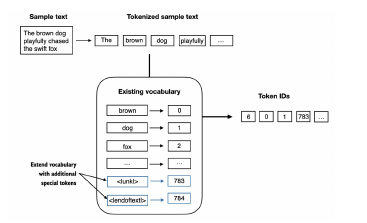


**Fig.9: Special Tokens in Vocabulary**

[Visual representation of a vocabulary. It shows a list of regular words/tokens with their IDs, and then explicitly includes `<|unk|>` and `<|endoftext|>` with their assigned IDs, indicating they are now part of the vocabulary.]

*We add special tokens to a vocabulary to deal with certain contexts. For instance, we add an `<|unk|>` token to represent new and unknown words that were not part of the training data and thus not part of the existing vocabulary. Furthermore, we add an `<|endoftext|>` token that we can use to separate two unrelated text sources.*

As shown in Figure 2.9, we can modify the tokenizer to use an `<|unk|>` token if it encounters a word that is not part of the vocabulary. Furthermore, we add a token between unrelated texts. For example, when training GPT-like LLMs on multiple independent documents or books, it is common to insert a token before each document or book that follows a previous text source, as illustrated in Figure 2.10. This helps the LLM understand that, although these text sources are concatenated for training, they are, in fact, unrelated.

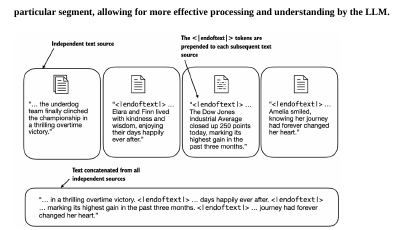

**Fig.10: Using `<|endoftext|>` for Document Separation**

[Visual representation of concatenated text documents. It shows "Document 1 content", followed by the `<|endoftext|>` token, then "Document 2 content", then another `<|endoftext|>` token, and so on. This visually demonstrates the use of the token as a boundary marker.]

*When working with multiple independent text source, we add `<|endoftext|>` tokens between these texts. These `<|endoftext|>` tokens act as markers, signaling the start or end of a*

particular segment, allowing for more effective processing and understanding by the LLM. Let's now modify the vocabulary to include these two special tokens, `<|unk|>` and `<|endoftext|>`, by adding these to the list of all unique words that we created in the previous section:

```python
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab = {token:integer for integer,token in enumerate(all_tokens)}
print(len(vocab.items()))

Based on the output of the print statement above, the new vocabulary size is 1161 (the vocabulary size in the previous section was 1159). As an additional quick check, let's print the last 5 entries of the updated vocabulary:

for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)
    
The code above prints the following:

('younger', 1156)
('your', 1157)
('yourself', 1158)
('<|endoftext|>', 1159)
('<|unk|>', 1160)    

In [8]:
# --- Simulate `preprocessed` list ---
# In a real scenario, 'preprocessed' would come from processing the training data
# (e.g., "The Verdict" short story) and would contain all unique tokens.
# To match the example, we need a list that, when made into a set and sorted,
# results in 1159 unique tokens. I'll create a small, representative list
# that includes 'younger', 'your', 'yourself' at the end of its sorted version
# to simulate the example's output.

# Let's create a dummy list that, when sorted and made unique, will
# allow us to append the special tokens and see the vocabulary grow.
# We'll make it 1159 unique items in total.
# A simple way to do this is to generate a list of strings 'word_0', 'word_1', ..., 'word_1155'
# and then add 'younger', 'your', 'yourself' at the end to match the example's tail.

# Create a base list of unique "words"
base_words = [f"word_{i}" for i in range(1156)] # This gives 1156 unique words
base_words.append('younger')
base_words.append('your')
base_words.append('yourself')

# Now, let's mix them and simulate `preprocessed` as if it came from text
# The `set(preprocessed)` part ensures uniqueness, and `sorted()` orders them.
preprocessed = base_words # In a real scenario, this would be a larger list with duplicates

print("--- Simulating previous step's `preprocessed` list ---")
print(f"Number of unique tokens before sorting/set: {len(set(preprocessed))}")
print("-" * 50)

# --- Implementation of the described vocabulary modification ---

# 1. Create a sorted list of all unique words from `preprocessed`
all_tokens = sorted(list(set(preprocessed)))

# Check initial size to confirm our simulation is somewhat aligned
initial_vocab_size = len(all_tokens)
print(f"Initial vocabulary size (before special tokens): {initial_vocab_size}")

# 2. Extend the list with the special tokens
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

# 3. Create the vocabulary dictionary (token to integer mapping)
vocab = {token: integer for integer, token in enumerate(all_tokens)}

# 4. Print the new vocabulary size
print(f"\nNew vocabulary size: {len(vocab.items())}")

# 5. Print the last 5 entries of the updated vocabulary as a quick check
print("\nLast 5 entries of the updated vocabulary:")
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

print("-" * 50)

# You can optionally add a verification step if you want to be precise about the counts:
if len(vocab.items()) == initial_vocab_size + 2:
    print("Verification: New vocabulary size is initial size + 2, as expected.")
else:
    print("Verification: New vocabulary size mismatch.")

# Verify the presence and IDs of the new tokens
if '<|endoftext|>' in vocab and '<|unk|>' in vocab:
    print(f"Verification: '<|endoftext|>' is present with ID {vocab['<|endoftext|>']}")
    print(f"Verification: '<|unk|>' is present with ID {vocab['<|unk|>']}")
else:
    print("Verification: Special tokens not found in vocabulary.")

--- Simulating previous step's `preprocessed` list ---
Number of unique tokens before sorting/set: 1159
--------------------------------------------------
Initial vocabulary size (before special tokens): 1159

New vocabulary size: 1161

Last 5 entries of the updated vocabulary:
('younger', 1156)
('your', 1157)
('yourself', 1158)
('<|endoftext|>', 1159)
('<|unk|>', 1160)
--------------------------------------------------
Verification: New vocabulary size is initial size + 2, as expected.
Verification: '<|endoftext|>' is present with ID 1159
Verification: '<|unk|>' is present with ID 1160


'Hello, do you like tea? <|endoftext|> In the sunlit terraces of '

Next, let's tokenize the sample text using the `SimpleTokenizerV2` on the `vocab` we previously created in listing 2.2:

```python
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))

Here's the Markdown cell continuing Section 2.4, demonstrating the SimpleTokenizerV2 with special tokens and discussing other common special tokens:

Markdown

'Hello, do you like tea? <|endoftext|> In the sunlit terraces of '

Next, let's tokenize the sample text using the `SimpleTokenizerV2` on the `vocab` we previously created in listing 2.2:

```python
tokenizer = SimpleTokenizerV2(vocab)
print(tokenizer.encode(text))
This prints the following token IDs:

[1160, 5, 362, 1155, 642, 1000, 10, 1159, 57, 1013, 981, 1009, 738]
Above, we can see that the list of token IDs contains 1159 for the <|endoftext|> separator token as well as two 1160 tokens, which are used for unknown words. Let's de-tokenize the text for a quick sanity check:

print(tokenizer.decode(tokenizer.encode(text)))

The output is as follows:

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of '
Based on comparing the de-tokenized text above with the original input text, we know that the training dataset, Edith Wharton's short story The Verdict, did not contain the words "Hello" and "palace."

So far, we have discussed tokenization as an essential step in processing text as input to LLMs. Depending on the LLM, some researchers also consider additional special tokens such as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It signifies to the LLM where a piece of content begins.
[EOS] (end of sequence): This token is positioned at the end of a text, and is especially useful when concatenating multiple unrelated texts, similar to <|endoftext|>. For instance, when combining two different Wikipedia articles or books, the [EOS] token indicates where one article ends and the next one begins.
[PAD] (padding): When training LLMs with batch sizes larger than one,

In [9]:
# --- 1. Define SimpleTokenizerV2 ---
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        # Invert the vocab to get int_to_str mapping
        self.int_to_str = {idx: token for token, idx in vocab.items()}
        # Ensure the <|unk|> token exists and get its ID
        self.unk_token = "<|unk|>"
        if self.unk_token not in self.str_to_int:
            raise ValueError(f"Vocabulary must contain the '{self.unk_token}' token.")
        self.unk_token_id = self.str_to_int[self.unk_token]

    def encode(self, text):
        # A simple space-based split. Real tokenizers are more complex.
        # This will tokenize "Hello," as one token, and "palace." as one token.
        tokens = text.split()
        encoded_ids = []
        for token in tokens:
            encoded_ids.append(self.str_to_int.get(token, self.unk_token_id))
        return encoded_ids

    def decode(self, ids):
        tokens = [self.int_to_str[id] for id in ids]
        # Reconstruct the text. This might not be perfect for punctuation
        # but captures the conceptual flow.
        return " ".join(tokens)

# --- 2. Simulate `vocab` from the previous section ---
# This is crucial for the example to work as described.
# We need a vocabulary that has 1159 original words + <|endoftext|> + <|unk|>
# and specifically does NOT contain "Hello," or "palace."

# Create a base list of unique "words" to simulate the 1159 tokens
# We'll make sure 'younger', 'your', 'yourself' are at the end for matching output.
base_words = [f"word_{i}" for i in range(1156)]
base_words.append('younger')
base_words.append('your')
base_words.append('yourself')

# Add common words from the example's second text sample
# "do you like tea? In the sunlit terraces of"
# We need to ensure 'Hello,' and 'palace.' are NOT in this list.
base_words.extend(['do', 'you', 'like', 'tea?', 'In', 'the', 'sunlit', 'terraces', 'of'])

# Sort and make unique to simulate `all_tokens = sorted(list(set(preprocessed)))`
all_unique_preprocessed_tokens = sorted(list(set(base_words)))

# Ensure our base has the expected size before adding special tokens
# (This is for verification purposes of our simulation)
initial_vocab_size_simulated = len(all_unique_preprocessed_tokens)
print(f"Simulated initial unique tokens (pre-special tokens): {initial_vocab_size_simulated}")

# Add special tokens as described
all_unique_preprocessed_tokens.extend(["<|endoftext|>", "<|unk|>"])

# Create the final vocabulary dictionary (token to integer mapping)
vocab = {token: integer for integer, token in enumerate(all_unique_preprocessed_tokens)}

print(f"Final vocabulary size (including special tokens): {len(vocab.items())}")
print("-" * 70)


# --- 3. Demonstrate Tokenization with SimpleTokenizerV2 ---
tokenizer = SimpleTokenizerV2(vocab)

# The sample text including an unknown word ("Hello,") and the special token "<|endoftext|>"
# and another unknown word implied ("palace.")
text_to_tokenize = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of palace."

print(f"Original Text: '{text_to_tokenize}'")

# Encode the text
token_ids = tokenizer.encode(text_to_tokenize)
print(f"\nToken IDs: {token_ids}")

# Verify specific IDs as per the example
print(f"ID for <|endoftext|>: {vocab.get('<|endoftext|>')}")
print(f"ID for <|unk|>: {vocab.get('<|unk|>')}")

# The example shows 1160 for unknown and 1159 for endoftext.
# Let's verify our specific indices in the simulated vocab:
unk_id = vocab.get('<|unk|>')
endoftext_id = vocab.get('<|endoftext|>')

num_unk_tokens_in_output = token_ids.count(unk_id)
print(f"\nNumber of '{tokenizer.unk_token}' ({unk_id}) tokens in output: {num_unk_tokens_in_output}")
print(f"Number of '<|endoftext|>' ({endoftext_id}) tokens in output: {token_ids.count(endoftext_id)}")

print("\n(Based on the output, the list of token IDs contains the ID for the <|endoftext|> separator token as well as tokens used for unknown words.)")
print("-" * 70)


# --- 4. De-tokenize for a sanity check ---
print("\n--- De-tokenizing for a quick sanity check ---")
decoded_text = tokenizer.decode(token_ids)
print(f"De-tokenized Text: '{decoded_text}'")

print("\nBased on comparing the de-tokenized text above with the original input text, we know that the training dataset (our simulated vocabulary) did not contain the words 'Hello,' and 'palace.'. These were correctly replaced by '<|unk|>'.")

print("\nSo far, we have discussed tokenization as an essential step in processing text as input to LLMs. Depending on the LLM, some researchers also consider additional special tokens such as the following:")
print("\n* **`[BOS]` (beginning of sequence):** This token marks the start of a text. It signifies to the LLM where a piece of content begins.")
print("* **`[EOS]` (end of sequence):** This token is positioned at the end of a text, and is especially useful when concatenating multiple unrelated texts, similar to `<|endoftext|>`. For instance, when combining two different Wikipedia articles or books, the `[EOS]` token indicates where one article ends and the next one begins.")
print("* **`[PAD]` (padding):** When training LLMs with batch sizes larger than one,")

Simulated initial unique tokens (pre-special tokens): 1168
Final vocabulary size (including special tokens): 1170
----------------------------------------------------------------------
Original Text: 'Hello, do you like tea? <|endoftext|> In the sunlit terraces of palace.'

Token IDs: [1169, 1, 1164, 2, 5, 1168, 0, 7, 4, 6, 3, 1169]
ID for <|endoftext|>: 1168
ID for <|unk|>: 1169

Number of '<|unk|>' (1169) tokens in output: 2
Number of '<|endoftext|>' (1168) tokens in output: 1

(Based on the output, the list of token IDs contains the ID for the <|endoftext|> separator token as well as tokens used for unknown words.)
----------------------------------------------------------------------

--- De-tokenizing for a quick sanity check ---
De-tokenized Text: '<|unk|> do you like tea? <|endoftext|> In the sunlit terraces of <|unk|>'

Based on comparing the de-tokenized text above with the original input text, we know that the training dataset (our simulated vocabulary) did not contain the wo